In [24]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
import matplotlib.pyplot as plt

In [25]:
spark = SparkSession.builder.appName("Datefruit_BisectingKMeans").getOrCreate()

In [26]:
data = spark.read.csv("Date_Fruit_Datasets.csv", header=True, inferSchema=True)

In [27]:
feature_cols = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

In [28]:
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
data = assembler.transform(data)

In [29]:
kmeans = BisectingKMeans(k=3, featuresCol='features')

In [30]:
model = kmeans.fit(data)

In [31]:
predictions = model.transform(data)

In [32]:
print("Cluster Centers:")
centers = model.clusterCenters()
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

Cluster Centers:
Cluster 0: [ 3.66694522e+05  2.28815459e+03  8.12875098e+02  5.78457470e+02
  6.95403986e-01  6.79383718e+02  9.80345290e-01  3.73614645e+05
  7.44273551e-01  1.42038080e+00  8.70301087e-01  8.35273913e-01
  2.28768116e-03  1.60760870e-03  6.99657246e-01  9.83479710e-01
  1.22407712e+02  1.15598458e+02  1.10562184e+02  3.17122283e+01
  2.86719565e+01  2.84456656e+01 -3.57540580e-01 -3.85525362e-02
  8.11666667e-03  2.90521630e+00  3.06223261e+00  3.32309819e+00
 -5.69298974e+10 -4.98929400e+10 -4.57447813e+10  6.12037442e+01
  5.77999188e+01  5.52816656e+01]
Cluster 1: [ 2.64736631e+05  1.88888751e+03  6.87665666e+02  4.75061200e+02
  7.18883618e-01  5.67692615e+02  9.86483276e-01  2.68145785e+05
  7.53019113e-01  1.48451058e+00  8.88251877e-01  8.21424915e-01
  2.89385666e-03  1.93071672e-03  6.77440614e-01  9.90573720e-01
  1.11223519e+02  1.07541898e+02  1.01724304e+02  3.12496611e+01
  2.75751119e+01  2.77374024e+01 -2.51854608e-01  2.31994539e-01
  2.44127304e-01 

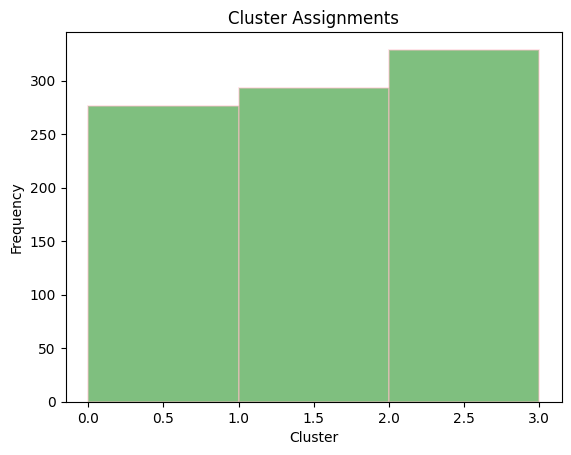

In [33]:
cluster_assignment = predictions.select("prediction").toPandas()
plt.hist(cluster_assignment['prediction'], bins=range(4), alpha=0.5, color='green', edgecolor='pink', linewidth=1.2)
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Cluster Assignments")
plt.show()

In [34]:
spark.stop()